This file loads csv data collected from our IMU, plots the accelerometer and gyroscope data, find peaks, and calculate stroke rate.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [17]:

# Load the data
#file_path = "../downloaded_files/datatest.csv"

file_path = "../downloaded_files/IMU_1.csv"

data = pd.read_csv(file_path, on_bad_lines='skip') 

# Ignore this
data_set_temp_string = 'data6'

Data preview:
      Time  AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
0  1265143   -4648    9244  -11676   1049   1639  -1046
1  1265154   -4636    9144  -11936   1054   1271  -1097
2  1265166   -4636    8784  -12172    966    947   -863
3  1265178   -4832    8544  -12212    881    155   -418
4  1265190   -5056    8692  -11972    758   -213   -189


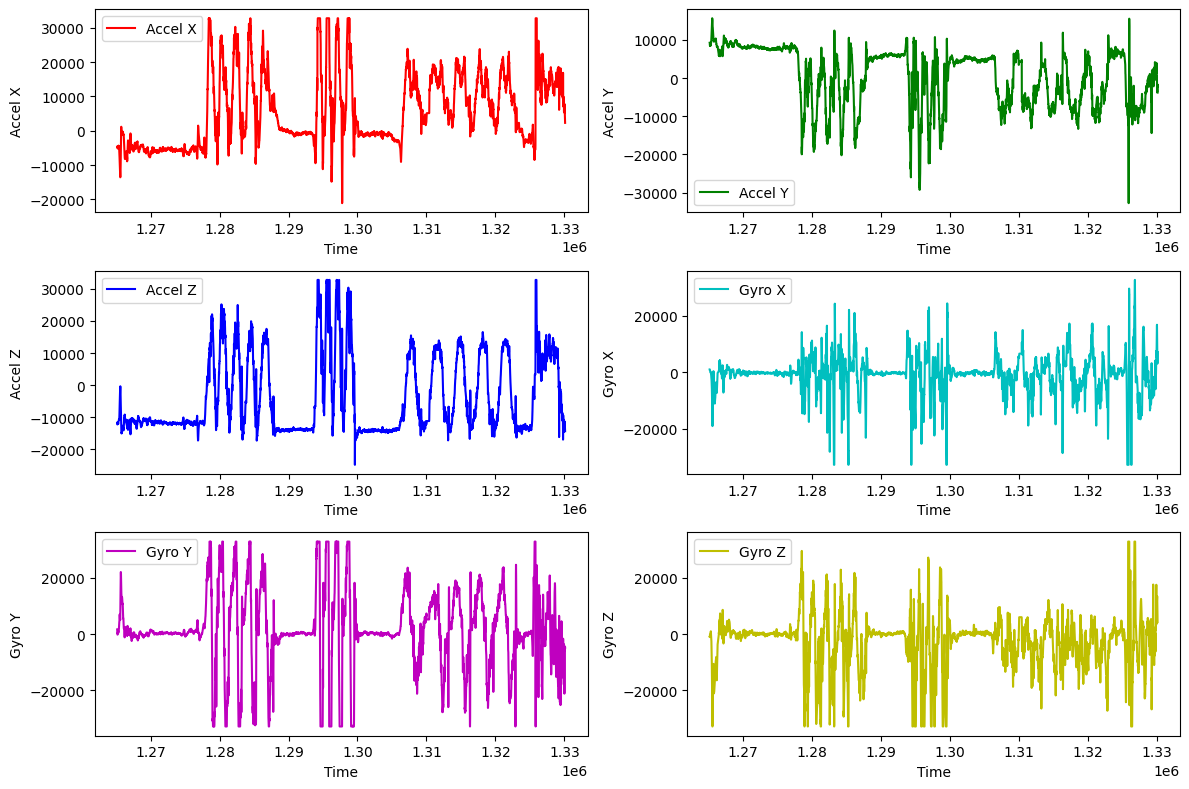

In [ ]:
print("Data preview:")
print(data.head())

show_plots = True

# Extract the columns
timestamps = data['Time']
accel_x = data['AccelX']
accel_y = data['AccelY']
accel_z = data['AccelZ']
gyro_x = data['GyroX']
gyro_y = data['GyroY']
gyro_z = data['GyroZ']

import matplotlib.pyplot as plt

# Plot all six data series over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(timestamps, accel_x, label='Accel X', color='r')
plt.xlabel('Time')
plt.ylabel('Accel X')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(timestamps, accel_y, label='Accel Y', color='g')
plt.xlabel('Time')
plt.ylabel('Accel Y')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(timestamps, accel_z, label='Accel Z', color='b')
plt.xlabel('Time')
plt.ylabel('Accel Z')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(timestamps, gyro_x, label='Gyro X', color='c')
plt.xlabel('Time')
plt.ylabel('Gyro X')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(timestamps, gyro_y, label='Gyro Y', color='m')
plt.xlabel('Time')
plt.ylabel('Gyro Y')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(timestamps, gyro_z, label='Gyro Z', color='y')
plt.xlabel('Time')
plt.ylabel('Gyro Z')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
from scipy.signal import savgol_filter

print(len(accel_x))
# Apply Savitzky-Golay filter twice for extra smoothing
smoothed_accel_x = savgol_filter(savgol_filter(accel_x, window_length=55, polyorder=2), window_length=55, polyorder=2)
smoothed_accel_y = savgol_filter(savgol_filter(accel_y, window_length=55, polyorder=2), window_length=55, polyorder=2)
smoothed_accel_z = savgol_filter(savgol_filter(accel_z, window_length=55, polyorder=2), window_length=55, polyorder=2)
smoothed_gyro_x = savgol_filter(savgol_filter(gyro_x, window_length=55, polyorder=2), window_length=55, polyorder=2)
smoothed_gyro_y = savgol_filter(savgol_filter(gyro_y, window_length=55, polyorder=2), window_length=55, polyorder=2)
smoothed_gyro_z = savgol_filter(savgol_filter(gyro_z, window_length=55, polyorder=2), window_length=55, polyorder=2)


5164


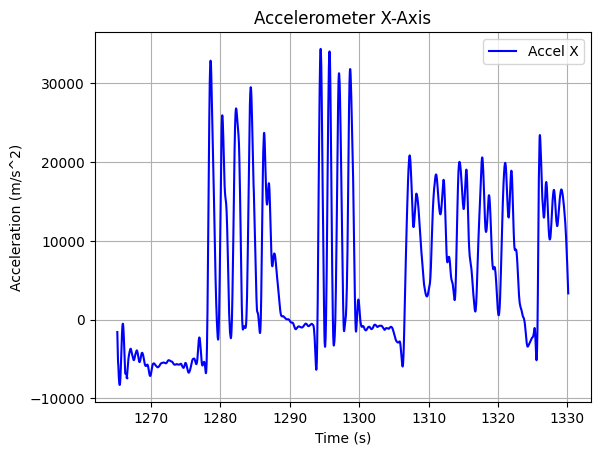

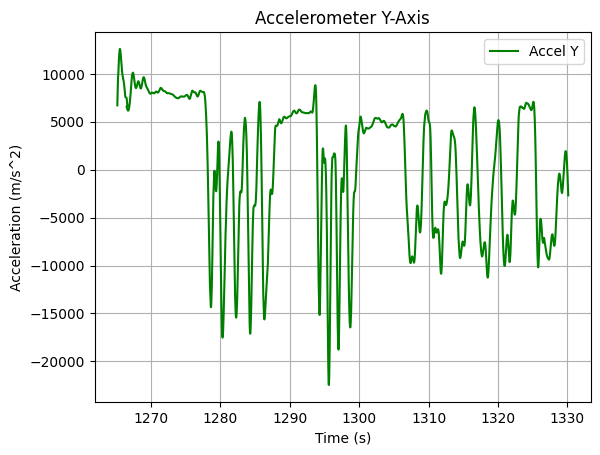

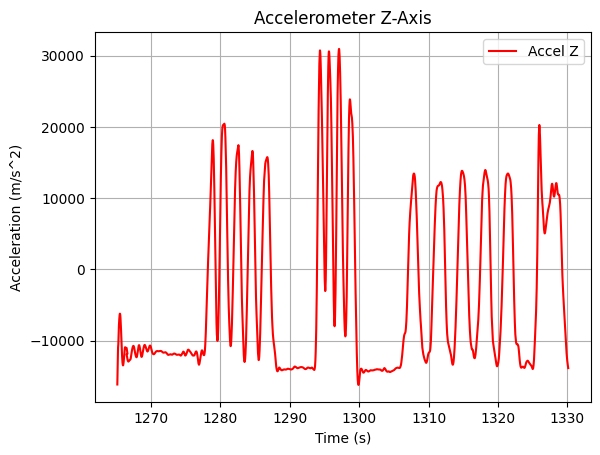

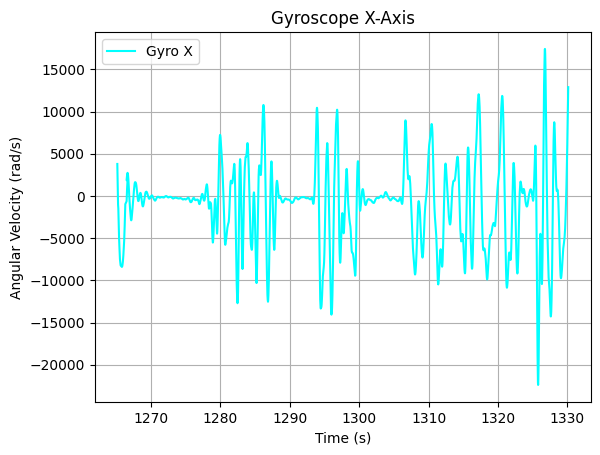

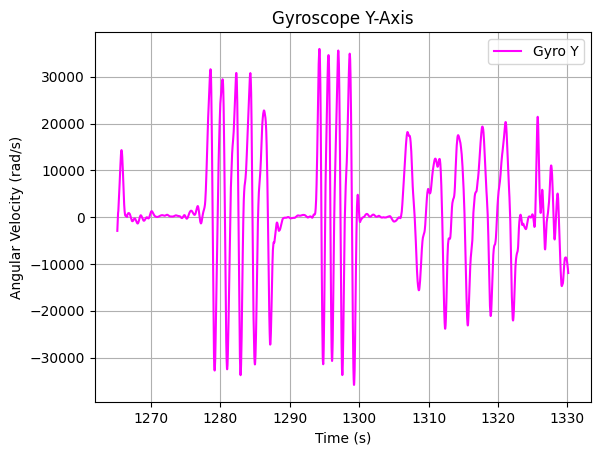

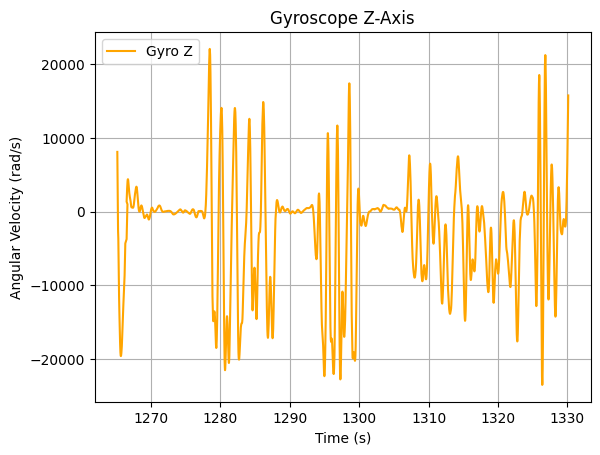

In [ ]:
# Adjust timestamps to match the length of smoothed data and convert to seconds
adjusted_timestamps = timestamps[:len(smoothed_accel_x)]  / 1000

plt.figure()
plt.plot(adjusted_timestamps, smoothed_accel_x, label="Accel X", color='blue')
plt.title("Accelerometer X-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(adjusted_timestamps, smoothed_accel_y, label="Accel Y", color='green')
plt.title("Accelerometer Y-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(adjusted_timestamps, smoothed_accel_z, label="Accel Z", color='red')
plt.title("Accelerometer Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(adjusted_timestamps, smoothed_gyro_x, label="Gyro X", color='cyan')
plt.title("Gyroscope X-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(adjusted_timestamps, smoothed_gyro_y, label="Gyro Y", color='magenta')
plt.title("Gyroscope Y-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(adjusted_timestamps, smoothed_gyro_z, label="Gyro Z", color='orange')
plt.title("Gyroscope Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# SAVING BLOCK (Can ignore)

import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()  # This should be inside 'esp IMU'
parent_dir = os.path.dirname(current_dir)  # Go up one level
save_path = os.path.join(parent_dir, "six_file_analysis", data_set_temp_string)


# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

#  Define plot labels and data
plot_data = [
    ("Accelerometer X-Axis", "Acceleration (m/s^2)", "Accel_X.png", smoothed_accel_x, "blue"),
    ("Accelerometer Y-Axis", "Acceleration (m/s^2)", "Accel_Y.png", smoothed_accel_y, "green"),
    ("Accelerometer Z-Axis", "Acceleration (m/s^2)", "Accel_Z.png", smoothed_accel_z, "red"),
    ("Gyroscope X-Axis", "Angular Velocity (rad/s)", "Gyro_X.png", smoothed_gyro_x, "cyan"),
    ("Gyroscope Y-Axis", "Angular Velocity (rad/s)", "Gyro_Y.png", smoothed_gyro_y, "magenta"),
    ("Gyroscope Z-Axis", "Angular Velocity (rad/s)", "Gyro_Z.png", smoothed_gyro_z, "orange"),
]

# Generate and save plots
for title, ylabel, filename, data, color in plot_data:
    plt.figure()
    plt.plot(adjusted_timestamps, data, label=title.split()[1], color=color)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(save_path, filename))  # Save the plot
    plt.close()  # Close the figure to free memory

print(f"Plots saved successfully in {save_path}")

Plots saved successfully in c:\Users\chenn\Documents\BMEG457\FORM24\six_file_analysis\data6


In [ ]:
import os
import matplotlib.pyplot as plt

# Save the plot
save_path = os.path.join(os.path.dirname(os.getcwd()), "six_file_analysis", data_set_temp_string)
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(12, 6))
plt.plot(adjusted_timestamps, smoothed_gyro_z, label="Smoothed Gyro Z", color="orange")
plt.title("Smoothed Gyroscope Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(save_path, "Smoothed_Gyro_Z.png"))
plt.close()

print(f"Smoothed Gyro Z plot saved successfully in {save_path}")


Smoothed Gyro Z plot saved successfully in c:\Users\chenn\Documents\BMEG457\FORM24\six_file_analysis\data6


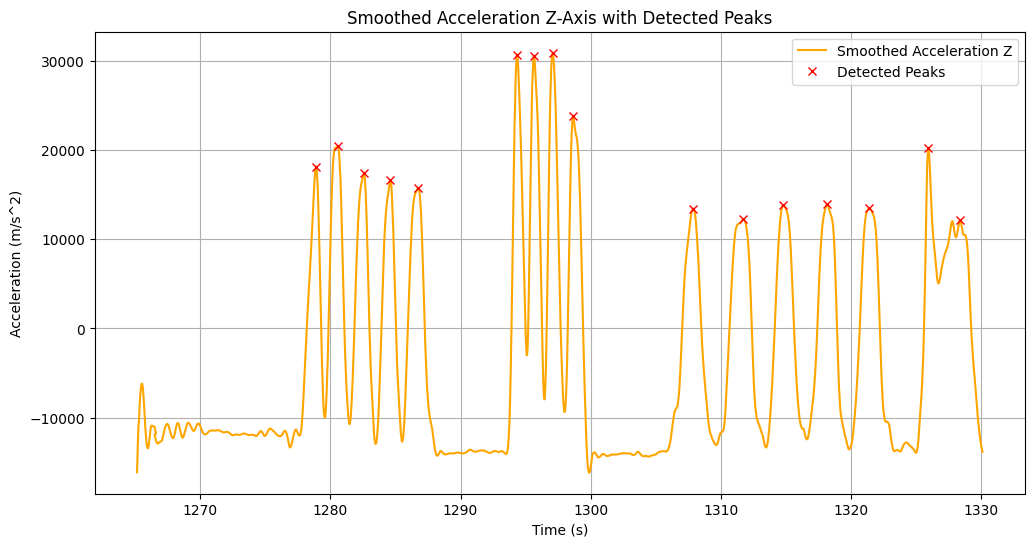

Mean: -3455.14, Std Dev: 11819.99, Max: 30930.43
Dynamic Height Threshold: -745.62
Dynamic Distance Threshold: 60 samples
Total Detected Peaks: 16
Smoothed Gyro Z plot with peaks saved successfully in c:\Users\chenn\Documents\BMEG457\FORM24\six_file_analysis\data6


In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import os

timestamps = np.array(adjusted_timestamps) # Ensure timestamps are NumPy array
gyro_z = np.array(smoothed_accel_z)  # Use smoothed gyro Z data

# Calculate dynamic thresholds
mean_value = np.mean(smoothed_accel_z)
std_dev = np.std(smoothed_accel_z)
max_value = np.max(smoothed_accel_z)

height_threshold = 0.9 * mean_value + 0.2 * std_dev  

sampling_rate = 30 
distance_threshold = int(sampling_rate * 2) 

# Detect peaks
peaks, properties = find_peaks(
    smoothed_accel_z,
    height=height_threshold,  # Minimum height
    distance=distance_threshold,
    prominence=0.5 * std_dev 
)

# Plot smoothed gyro Z data with detected peaks
plt.figure(figsize=(12, 6))
plt.plot(timestamps, smoothed_accel_z, label='Smoothed Acceleration Z', color='orange')
plt.plot(timestamps[peaks], gyro_z[peaks], 'rx', label='Detected Peaks')
plt.title('Smoothed Acceleration Z-Axis with Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Save the plot
save_path = os.path.join(os.path.dirname(os.getcwd()), "six_file_analysis", data_set_temp_string)
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, "Smoothed_Accel_Z_Peaks.png"))
plt.close()

# Print debugging info
print(f"Mean: {mean_value:.2f}, Std Dev: {std_dev:.2f}, Max: {max_value:.2f}")
print(f"Dynamic Height Threshold: {height_threshold:.2f}")
print(f"Dynamic Distance Threshold: {distance_threshold} samples")
print(f"Total Detected Peaks: {len(peaks)}")
print(f"Smoothed Gyro Z plot with peaks saved successfully in {save_path}")


Filtered timestamps count: 1437
Filtered peaks count: 5
First 10 Filtered Peaks (Index): [3388, 3705, 3944, 4214, 4475]
First 10 Filtered Peaks (Timestamps): [1307.863, 1311.772, 1314.789, 1318.183, 1321.463]


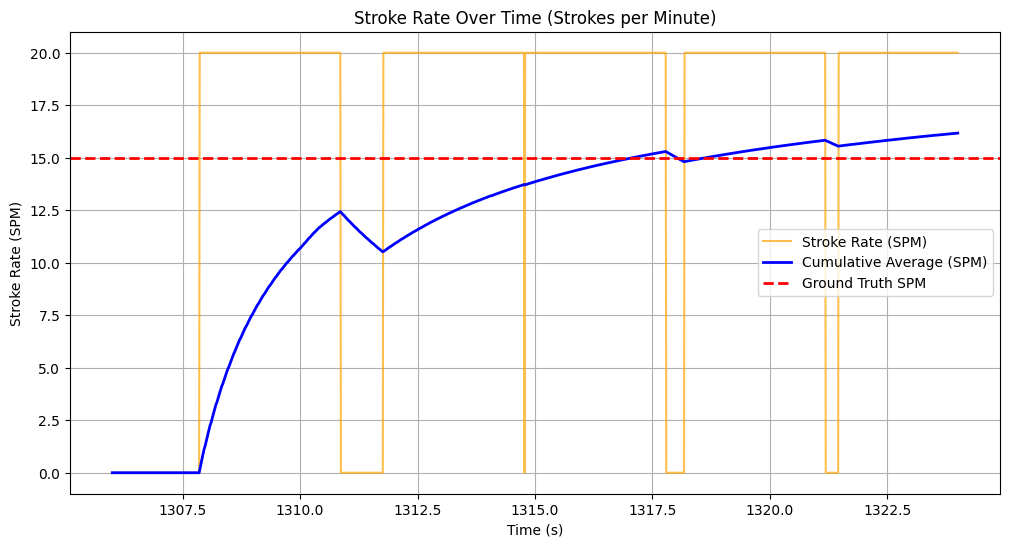

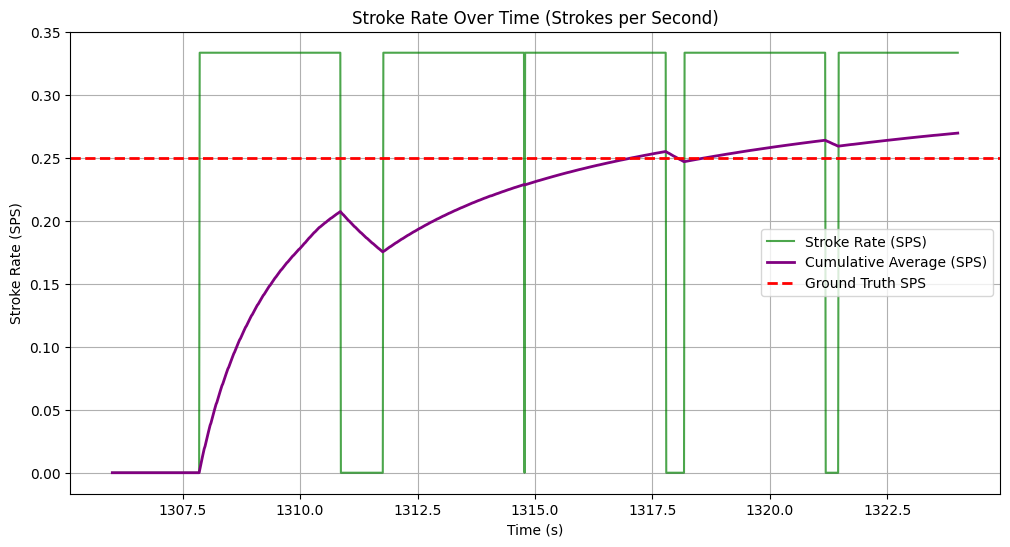

Final Cumulative Average Stroke Rate: 16.17 strokes/minute
Final Cumulative Average Stroke Rate: 0.27 strokes/second
Ground Truth Stroke Rate: 15.00 strokes/minute
Ground Truth Stroke Rate: 0.25 strokes/second


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure timestamps are NumPy array for easier calculations
timestamps = np.array(adjusted_timestamps)

# Define adjustable time window (same as previous block)
start_time = 1306
end_time = 1324

# Ground truth values 
ground_truth_spm = 15
ground_truth_sps = 0.25

# Reuse filtered timestamps from the previous block
valid_indices = np.where((timestamps >= start_time) & (timestamps <= end_time))[0]
filtered_timestamps = timestamps[valid_indices]  # Explicitly assign filtered timestamps

# Filter peaks based on selected time range
filtered_peaks = [p for p in peaks if timestamps[p] >= start_time and timestamps[p] <= end_time]

# Debugging prints
print(f"Filtered timestamps count: {len(filtered_timestamps)}")
print(f"Filtered peaks count: {len(filtered_peaks)}")
print(f"First 10 Filtered Peaks (Index): {filtered_peaks[:10]}")
print(f"First 10 Filtered Peaks (Timestamps): {[timestamps[p] for p in filtered_peaks[:10]]}")

# If no peaks or timestamps are detected, exit to avoid plotting errors
if len(filtered_peaks) == 0 or len(filtered_timestamps) == 0:
    print("Error: No peaks or timestamps detected in the selected range.")
    exit()

# Calculate stroke rate (SPM: Strokes Per Minute) and SPS (Strokes Per Second)
stroke_rate_spm = []
stroke_rate_sps = []
cumulative_spm = []
cumulative_sps = []
window = 3  # Window size in seconds for stroke rate calculation

for i, t in enumerate(filtered_timestamps):
    window_start_time = t - window
    valid_peaks = [p for p in filtered_peaks if timestamps[p] >= window_start_time and timestamps[p] <= t]

    # Stroke rate calculations
    rate_spm = len(valid_peaks) * (60 / window)
    stroke_rate_spm.append(rate_spm)
    
    rate_sps = len(valid_peaks) / window
    stroke_rate_sps.append(rate_sps)
    
    # Cumulative averages
    cumulative_spm.append(sum(stroke_rate_spm) / len(stroke_rate_spm))
    cumulative_sps.append(sum(stroke_rate_sps) / len(stroke_rate_sps))


# If stroke rates are empty, print error and exit
if len(stroke_rate_spm) == 0 or len(stroke_rate_sps) == 0:
    print("Error: No valid stroke rate data calculated.")
    exit()

# Plot the stroke rate (SPM) with cumulative average and ground truth line
plt.figure(figsize=(12, 6))
plt.plot(filtered_timestamps, stroke_rate_spm, label='Stroke Rate (SPM)', color='orange', alpha=0.7)
plt.plot(filtered_timestamps, cumulative_spm, label='Cumulative Average (SPM)', color='blue', linewidth=2)
plt.axhline(y=ground_truth_spm, color='red', linestyle='--', linewidth=2, label='Ground Truth SPM')  # Add horizontal line
plt.title('Stroke Rate Over Time (Strokes per Minute)')
plt.xlabel('Time (s)')
plt.ylabel('Stroke Rate (SPM)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the stroke rate (SPS) with cumulative average and ground truth line
plt.figure(figsize=(12, 6))
plt.plot(filtered_timestamps, stroke_rate_sps, label='Stroke Rate (SPS)', color='green', alpha=0.7)
plt.plot(filtered_timestamps, cumulative_sps, label='Cumulative Average (SPS)', color='purple', linewidth=2)
plt.axhline(y=ground_truth_sps, color='red', linestyle='--', linewidth=2, label='Ground Truth SPS')  # Add horizontal line
plt.title('Stroke Rate Over Time (Strokes per Second)')
plt.xlabel('Time (s)')
plt.ylabel('Stroke Rate (SPS)')
plt.legend()
plt.grid(True)
plt.show()

# Print final cumulative averages and ground truth
print(f"Final Cumulative Average Stroke Rate: {cumulative_spm[-1]:.2f} strokes/minute")
print(f"Final Cumulative Average Stroke Rate: {cumulative_sps[-1]:.2f} strokes/second")
print(f"Ground Truth Stroke Rate: {ground_truth_spm:.2f} strokes/minute")
print(f"Ground Truth Stroke Rate: {ground_truth_sps:.2f} strokes/second")
